# Blog for How to Create a Database about Specific Domain Accociated with Social Media Information (SQL part) 
## (Including Design Explanation, Technical Explanation, relative code and sample data, some useful resources and the licence)
### In this blog, we choose Movie as our domain and use Twitter as social media example to help us create the database. 

# 1. Design Explanation (including the database structure -ER-diagram and real process of building database)
## 1.1 Database structure (ER-diagram design)
### For creating database, the first thing you need to consider the structure of database for you domain or topic about database, you need to consider which entity should be included in your database for some specific aims you want to achieve or some problems you want to solve. And for each entity, you may want to consider which attribute should be included to describe the data information. 
### Here we use Movie as our domain and show you the table and schema of structure below to illustrate how we design the ER-Diagram for our database structure.

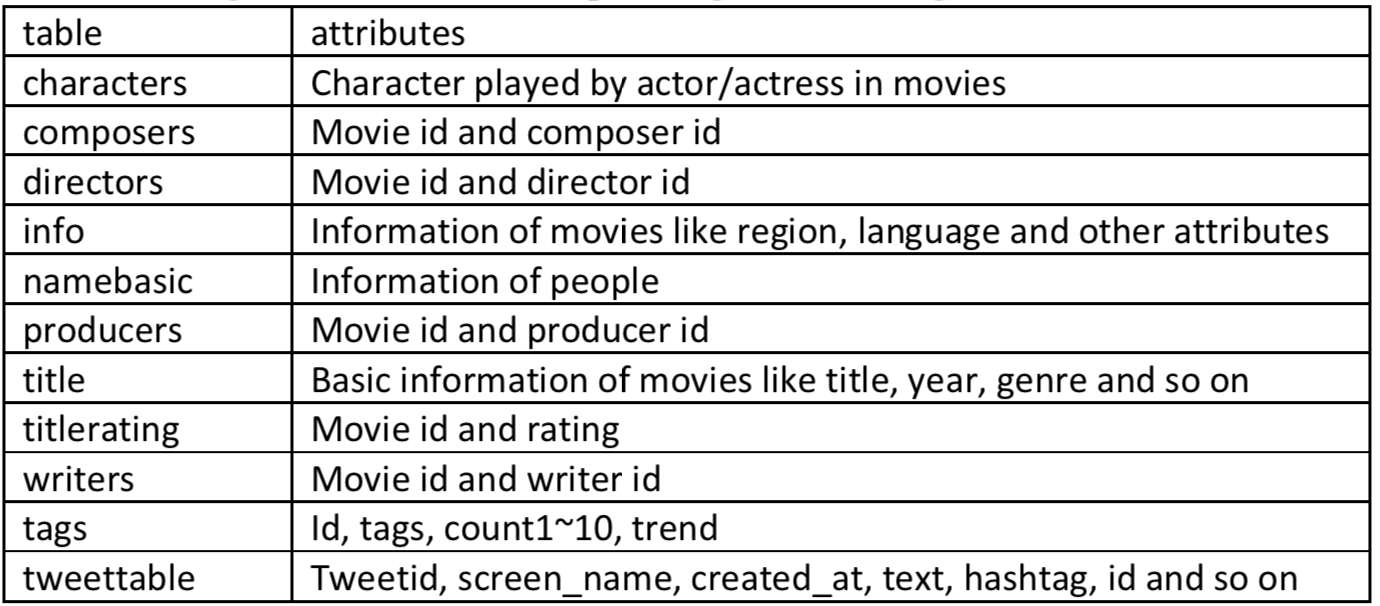

##### This is the basic information of each table and their attributes


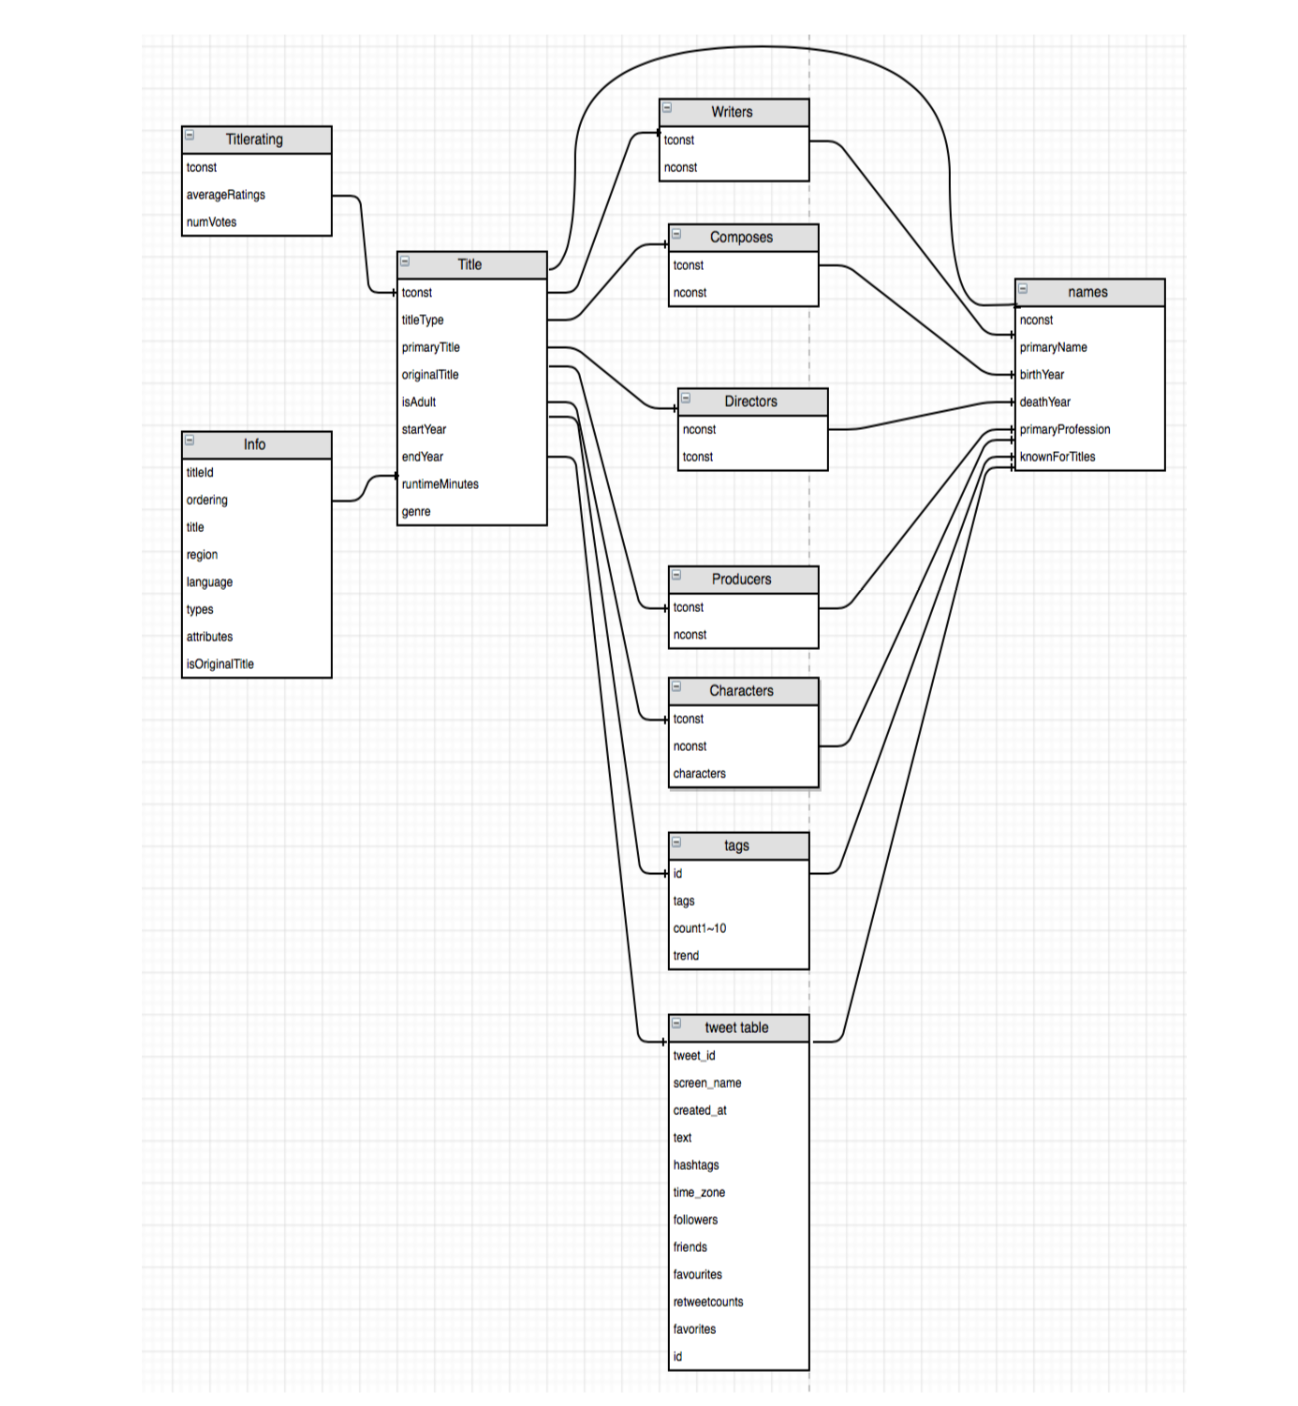

### This is the ER-Diagram of our database, we have 11 tables and you can see the relationship between each other from the schema above. In this ER-Diagram, we include some basic information about Movie domain like Director, Actor, Title, etc, we also include some information from social media like tweettable and tags table. And these data help us build the whole database to solve some problems.

## 1.2 After the design of database structure, let me show you the basic process of building the database:

#### 1) Find original datasets and download, separate them into reasonable tables based on the ER-diagram
#### 2) Preprocess data into appropriate form (cleaning, changing into Normal Form, etc) using Python and make data ready to insert into SQL database
#### 3) Connect Mysql database with Python, insert data into Mysql workbeach.
#### 4) Check the insert results in Workbeach
#### 5) Use Python to retrieve data from database to solve problems or answer questions.

### You will see more technical detail in the next part

# 2. Technical Explanation with Sample Data and Relative Code
### Now let me show you some technical process of creating basic database based on the design ideas above. Take Movie for example. 
### First, we can download the basic data about movie from https://www.imdb.com/interfaces/, which is an official interface from IMDB, we can download data from it. And for social media data, like Twitter, you can use official API to scrape the data from Twitter, here we take the Tweepy API for example, http://tweepy.readthedocs.io/en/v3.5.0/, you can click this link and learn how to use Tweepy API in Python to scrape the data you want from Twitter. Here we used this API scrape data to build two tables, tweettable and tags table, you can see more details below.
### ( For the content of scraping from Twitter, you may need to the decide some KEYWORDS for the topic of searching, and use the API to scrape relative content. Then based on your requirements or goals to design the table related to the social media. Here we created the tags table and the tweettable)
### Second, as you can see on the website, there are just 7 tables for movie data. Here based on our ER-Diagram, we can separate one basic data table from website into several tables according to our design and requirements. Use these reasonable tables and the social media tables created by you own as the basic data tables to insert.
### ( You can compare the differences between the design of database structure and the data structure in original data table to decide how to separate them using Python, Excel or Mysql workbeach. )
### Thirdly, when you finish the separation process, we need to check the data form based on your database's requirement like the First Normal Form, Second Normal Form, etc. You need to change the data form into certain Normal Form and insert them into your database.
### Fourthly, like mentioned above, you need to use Python to do some preprocessing work like cleaning data including fix the NULL values, remove some outliers values, etc. Then connect Python with Mysql database with some specific packages like PYMYSQL, insert data into database.
### Fifthly, you can use Mysql IDE Workbeach or Shell to check the results of inserting.
### Finally, now, you can use Python to retrieve the data from Mysql database to solve the problems or answer the questions. ( You can see some concrete methods below. )

### Now we show you some example about all the technical explanations above ( including data sample, code, etc. ):

### Some sample data after separation:

### Title table:


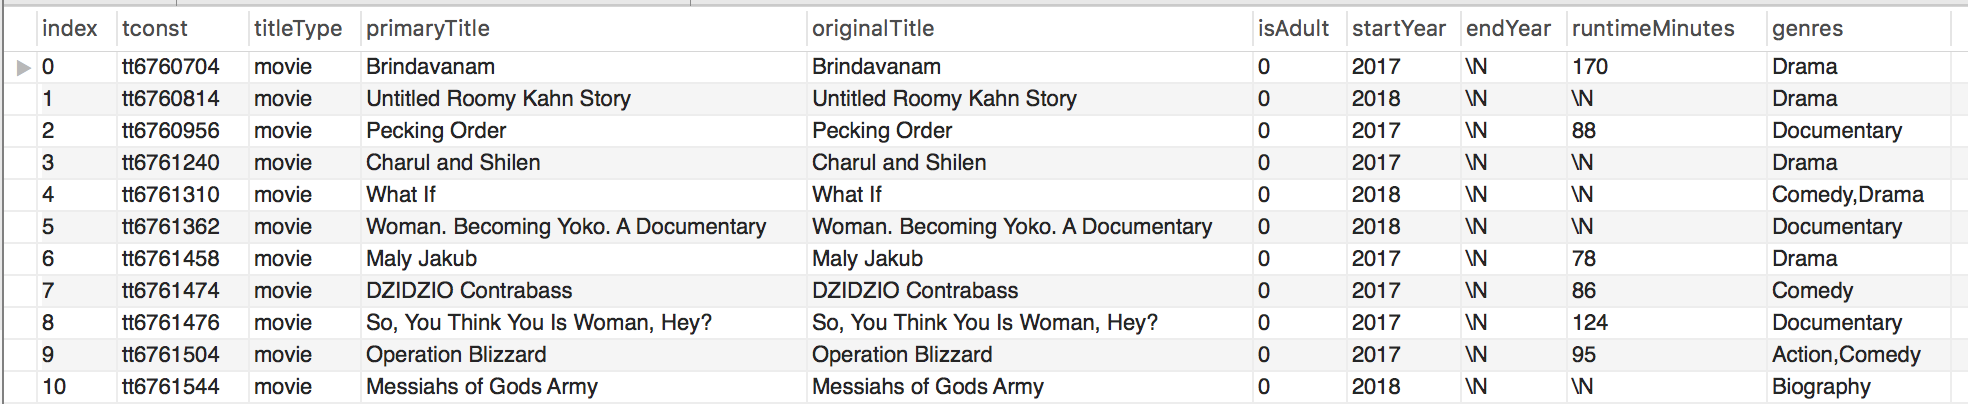

### Names table:


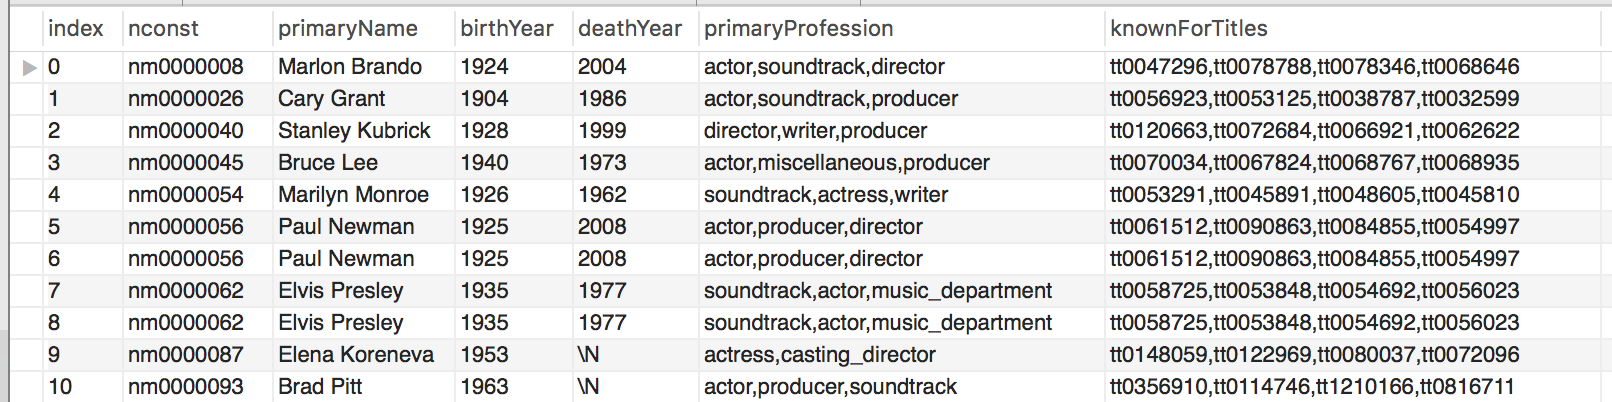

### Tweettable:


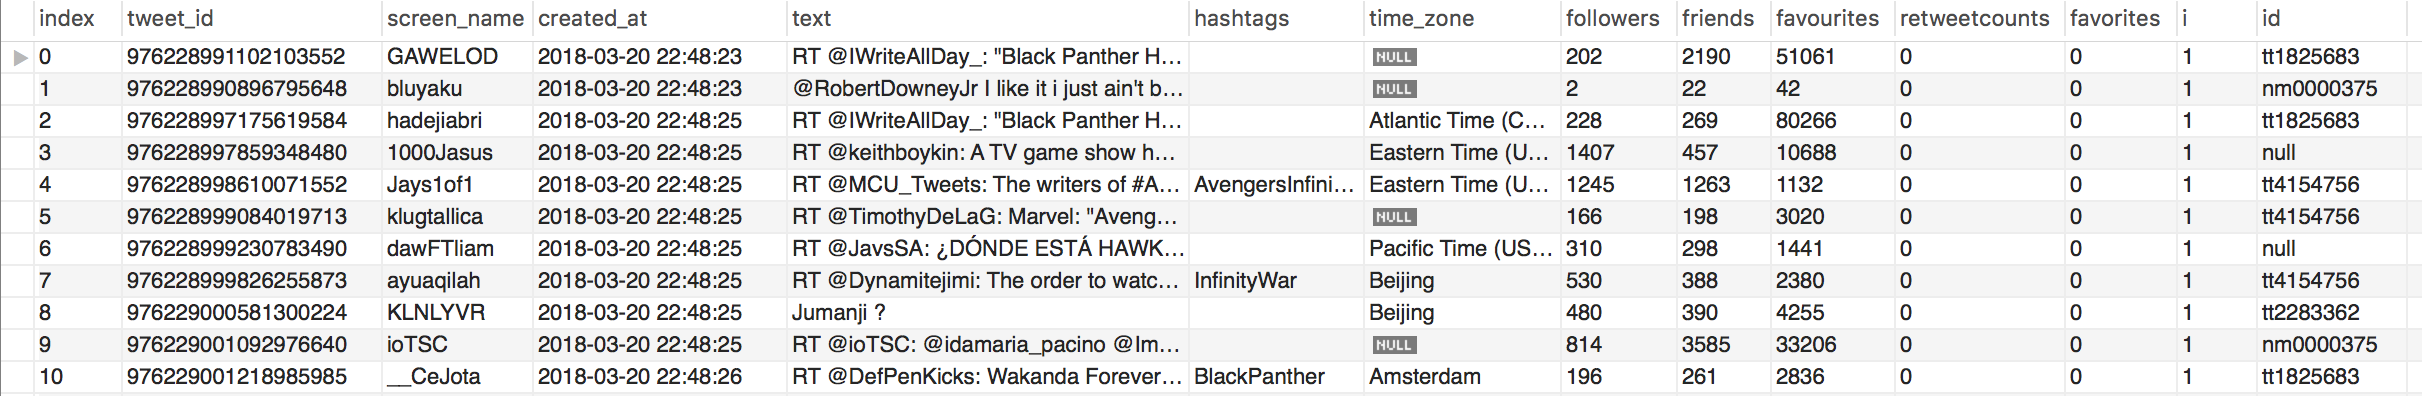

### Tags table:


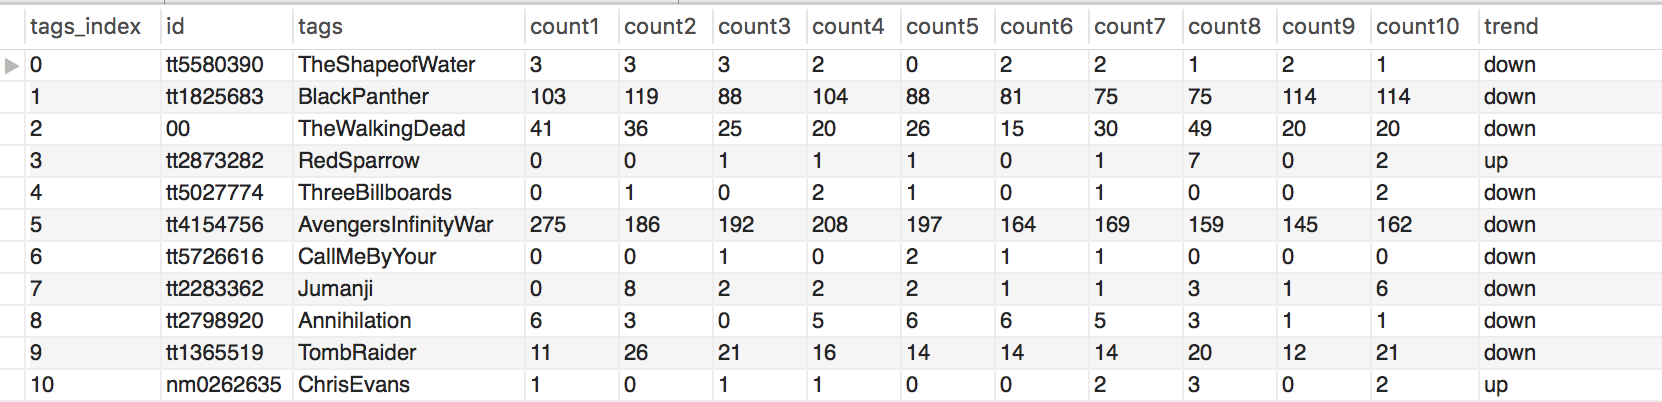

### Relative code in Python:

### Basic packages we need to use:

In [ ]:
import csv
import pandas as pd
import pymysql
import tweepy
import json
from dateutil import parser
import pandas as pd
import re
import pymysql
import sqlalchemy

### Read csv files from computer: 

In [ ]:
names = pd.read_csv("Desktop/names.csv")
info = pd.read_csv("Desktop/info.csv")
composers = pd.read_csv("Desktop/composers.csv")
directors = pd.read_csv("Desktop/directors.csv")
title = pd.read_csv("Desktop/title.csv")
characters = pd.read_csv("Desktop/characters.csv")
titlerating = pd.read_csv("Desktop/titlerating.csv")
producers = pd.read_csv("Desktop/producers.csv")
writers = pd.read_csv("Desktop/writers.csv")

### Connect the Mysql database with Python:

In [ ]:
yconnect = sqlalchemy.create_engine('mysql+pymysql://root:@127.0.0.1:3306/assignment2?charset=utf8')
CONSUMER_KEY = 'RC5aZYjVtp4vVZXTPyFsTAvQj'
CONSUMER_SECRET = 'WzaNQnjW63rFiVQuIw6cDDbqfD909CG3g9gFgrpZZs3ORRItkT'
ACCESS_TOKEN = '963218364998078464-rlszyp5bDgBfEQXZXNqxNDyRW8G3VER'
ACCESS_TOKEN_SECRET = 'DpblUYvmh6Z1Wv1D49lihbNlHm7xIuVd4xRkPY0DTsL9x'

db = pymysql.connect(host = '127.0.0.1', port = 3306, user = 'root', db = 'assignment1',charset='utf8mb4')
cursor = db.cursor()

### Insert data tables into Mysql database:

In [ ]:
pd.io.sql.to_sql(names,'names', yconnect, schema='assignment2')
pd.io.sql.to_sql(info,'info', yconnect, schema='assignment2')
pd.io.sql.to_sql(composers,'composers', yconnect, schema='assignment2')
pd.io.sql.to_sql(directors,'directors', yconnect, schema='assignment2')
pd.io.sql.to_sql(title,'title', yconnect, schema='assignment2')
pd.io.sql.to_sql(characters,'characters', yconnect, schema='assignment2')
pd.io.sql.to_sql(titlerating,'titlerating', yconnect, schema='assignment2')
pd.io.sql.to_sql(producers,'producers', yconnect, schema='assignment2')
pd.io.sql.to_sql(writers,'writers', yconnect, schema='assignment2')

### Sample Tweepy API Code used to scrape data from Twitter:

In [ ]:
W1=["KEYWORD"]

def store_data(created_at, text, screen_name, tweet_id, hashtags, time_zone, followers, friends, favourites, retweetcounts, favorites):
    db = pymysql.connect(host = '127.0.0.1', port = 3306, user = 'root', db = 'assignment2',charset='utf8mb4')
    cursor = db.cursor()
    insert_query = "INSERT INTO tweets_9 (tweet_id, screen_name, created_at, text, hashtags, time_zone, followers, friends, favourites, retweetcounts, favorites) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
    cursor.execute(insert_query, (tweet_id, screen_name, created_at, text, hashtags, time_zone, followers, friends, favourites, retweetcounts, favorites))
    db.commit()
    cursor.close()
    db.close()
    return

def processTweet2(tweet):
    # process the tweets

    #Convert to lower case
    tweet = tweet.lower()
    #Convert www.* or https?://* to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','AT_USER',tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #trim
    tweet = tweet.strip('\'"')
    return tweet
    
class StreamListener(tweepy.StreamListener):    
    #This is a class provided by tweepy to access the Twitter Streaming API. 

    def on_connect(self):
        # Called initially to connect to the Streaming API
        print("You are now connected to the streaming API.")
 
    def on_error(self, status_code):
        # On error - if an error occurs, display the error / status code
        print('An Error has occured: ' + repr(status_code))
        return False
 
    def on_data(self, data):
        #This is the meat of the script...it connects to your mongoDB and stores the tweet
        try:
           # Decode the JSON from Twitter
            datajson = json.loads(data)
            
            #grab the wanted data from the Tweet
            text = datajson['text']
            screen_name = datajson['user']['screen_name']
            tweet_id = datajson['id']
            created_at = parser.parse(datajson['created_at']) 
            hashtags=''
            for i in datajson['entities']['hashtags']:
                hashtags = hashtags + i['text']+' '
            
            time_zone = datajson['user']['time_zone']
            followers = datajson['user']['followers_count']
            friends = datajson['user']['friends_count']
            favourites = datajson['user']['favourites_count']
            retweetcounts = datajson['retweet_count']
            favorites = datajson['favorite_count']
            
            #text=processTweet2(text)
            #print out a message to the screen that we have collected a twee
            print("Tweet collected at " + str(created_at))
            
            #insert the data into the MySQL database
            store_data(created_at, text, screen_name, tweet_id, hashtags, time_zone, followers, friends, favourites, retweetcounts, favorites)
        
        except Exception as e:
            print(e)

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
#Set up the listener. The 'wait_on_rate_limit=True' is needed to help with Twitter API rate limiting.
listener = StreamListener(api=tweepy.API(wait_on_rate_limit=True)) 
streamer = tweepy.Stream(auth=auth, listener=listener, tweet_mode='extended')
#print("Tracking: " + str(WORDS))
streamer.filter(track=W1)

### You can use your own keywords to replace the "KEYWORD" in the first row to scrape the relative data about your topic or domain

### Define a function which can help us retrieve data from Mysql database and show the results in Jupyter Notebook:

In [ ]:
def sql_to_df(sql_query):
    df=pd.read_sql(sql_query,db)
    return df

### An example to retrieve data from Mysql database from Jupyter notebook:

In [ ]:
sqlquery = '''SELECT time_zone, hashtags, friends FROM assignment2.tweettable
where hashtags like "%Panther%";'''
sql_to_df(sqlquery)

### We write the sql query code into string and use function defined above to retrieve data from database

# 3. Other Sample Data about Basic Data Tables

### Info:


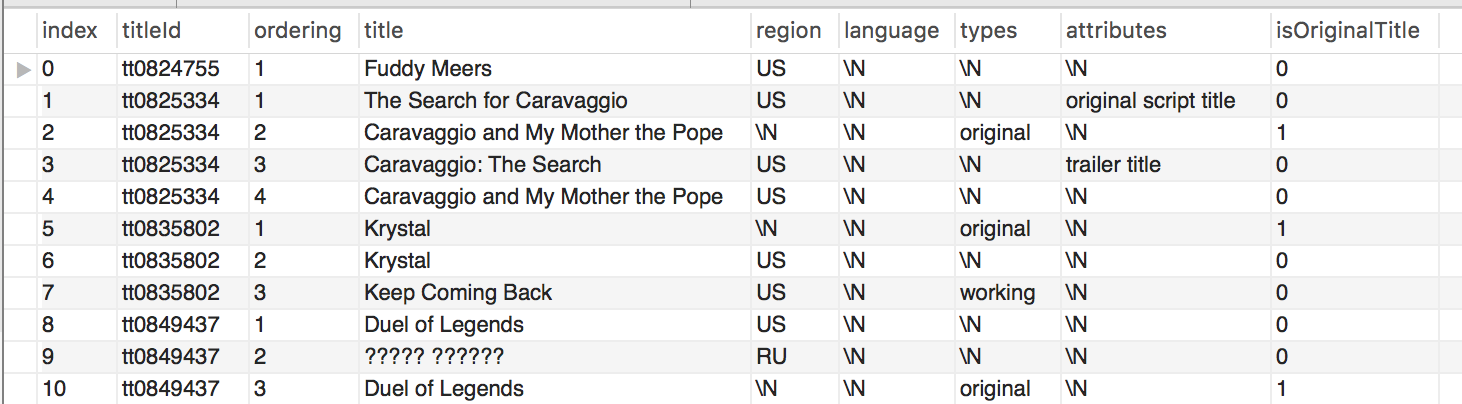

### Producer:


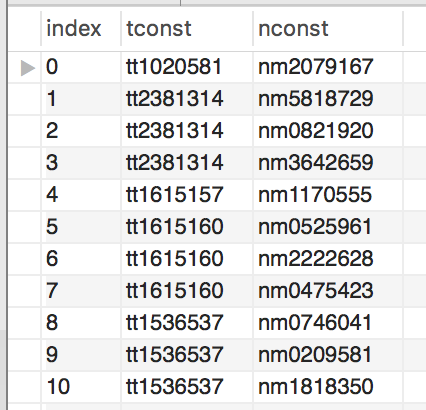

### Composer:


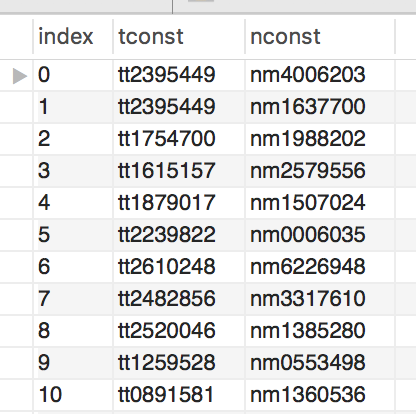

### Writer:


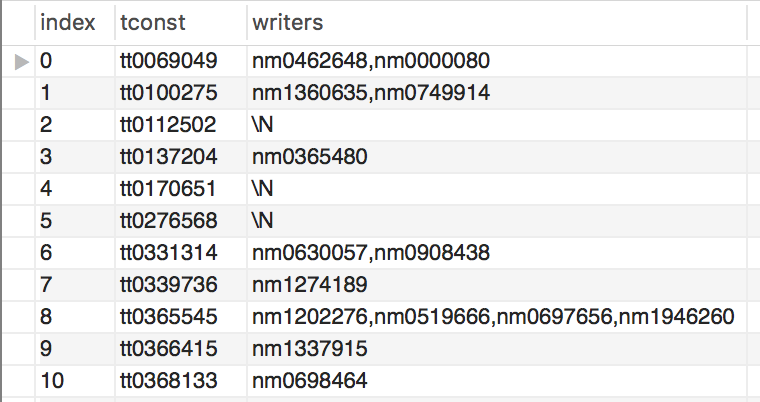

### Character:


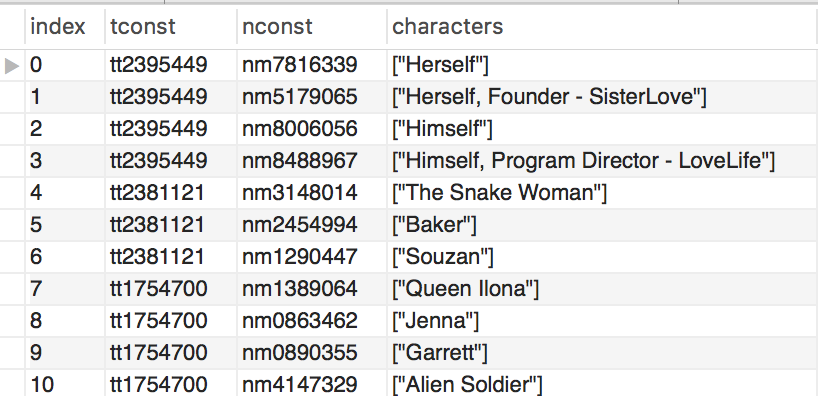

### Director:


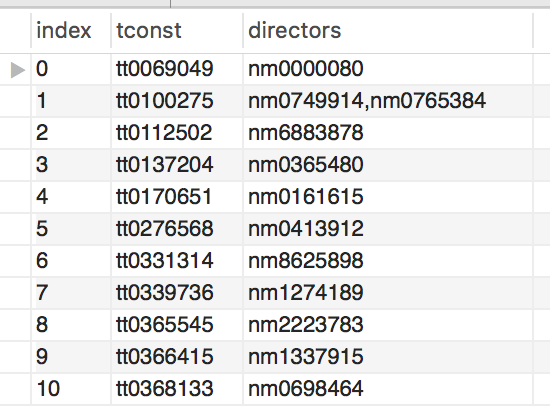

### Titlerating:


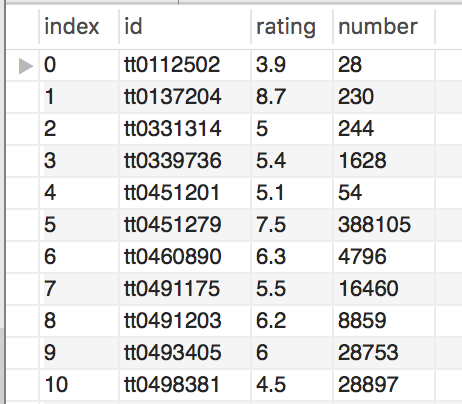

# 4. Appendix and Useful Resource

### IMDB Dataset: https://www.imdb.com/interfaces/ (You can directly download dataset from this website)
### Tweepy Tutorial: http://tweepy.readthedocs.io/en/v3.5.0/ (You can follow this tutorial to scrape data from Twitter directly)

# 5. The License

Copyright <2018> <COPYRIGHT Yue Bai>

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

<a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/3.0/us/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/">Creative Commons Attribution 3.0 United States License</a>.